In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = 'data/'

In [4]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [5]:
train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

## processing variables

In [6]:
batch_size = 128
epochs = 5
IMG_DIMENSION = 244

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_DIMENSION, IMG_DIMENSION),
                                                           class_mode='binary')

Found 2637 images belonging to 2 classes.


In [9]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_DIMENSION, IMG_DIMENSION),
                                                              class_mode='binary')

Found 660 images belonging to 2 classes.


In [10]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

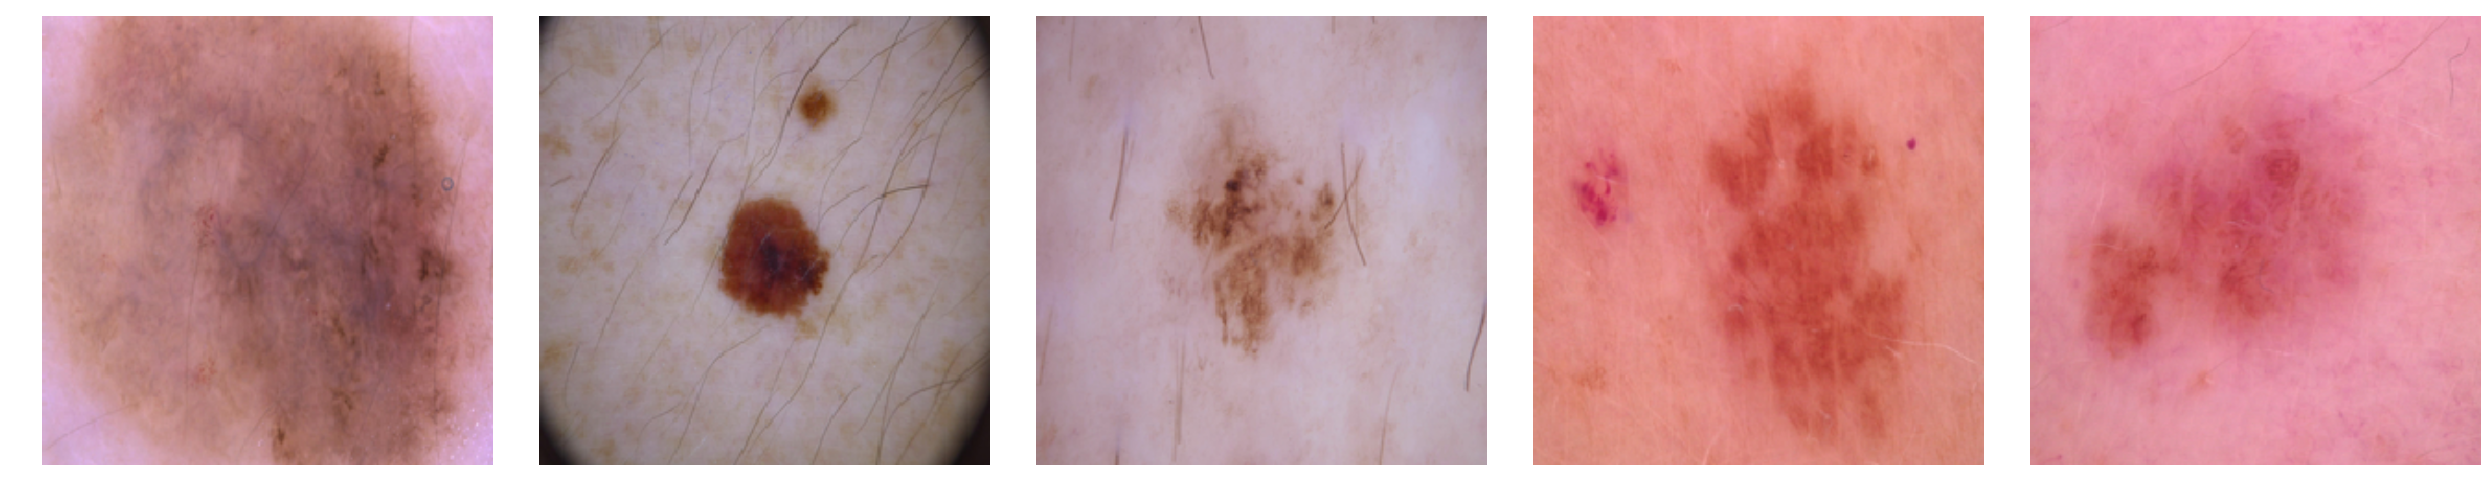

In [11]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

In [12]:
model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_DIMENSION, IMG_DIMENSION, 3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [15]:
total_train_size = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
total_test_size = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))
total_data_size = total_train_size + total_test_size

In [16]:
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=total_train_size // batch_size,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              validation_steps=total_test_size // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 5 steps
Epoch 1/5
20/20 [==============================] - 258s 13s/step - loss: 1.2393 - accuracy: 0.5711 - val_loss: 0.4951 - val_accuracy: 0.7188
Epoch 2/5
20/20 [==============================] - 225s 11s/step - loss: 0.4539 - accuracy: 0.7481 - val_loss: 0.3943 - val_accuracy: 0.7672
Epoch 3/5
20/20 [==============================] - 224s 11s/step - loss: 0.4098 - accuracy: 0.7732 - val_loss: 0.3747 - val_accuracy: 0.8156
Epoch 4/5
20/20 [==============================] - 204s 10s/step - loss: 0.3860 - accuracy: 0.7919 - val_loss: 0.3579 - val_accuracy: 0.8125
Epoch 5/5
20/20 [==============================] - 191s 10s/step - loss: 0.3533 - accuracy: 0.8151 - val_loss: 0.3495 - val_accuracy: 0.8172


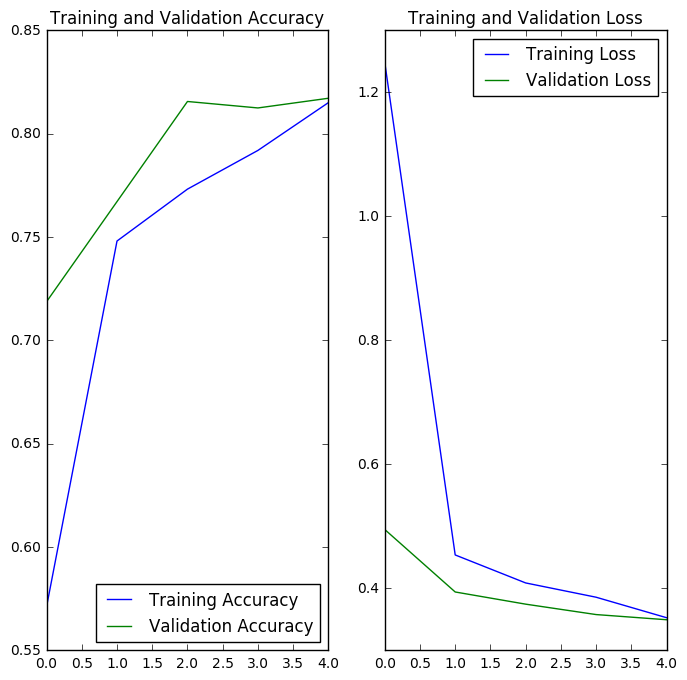

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()